In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 kB 15.6 MB/s eta 0:00:00


In [3]:
# Import Libraries
import os
import cv2
import random
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ultralytics import YOLO

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Paths for Dataset and Outputs
images_dir = '/content/drive/MyDrive/Diabetes/Dataset/images'
labels_dir = '/content/drive/MyDrive/Diabetes/Dataset/labels'
yaml_file = '/content/drive/MyDrive/Diabetes/data.yaml'
model_save_path = '/content/drive/MyDrive/Diabetes/checkpoints/yolov8_trained.pt'
crop_output_dir = '/content/drive/MyDrive/Diabetes/data_crop'

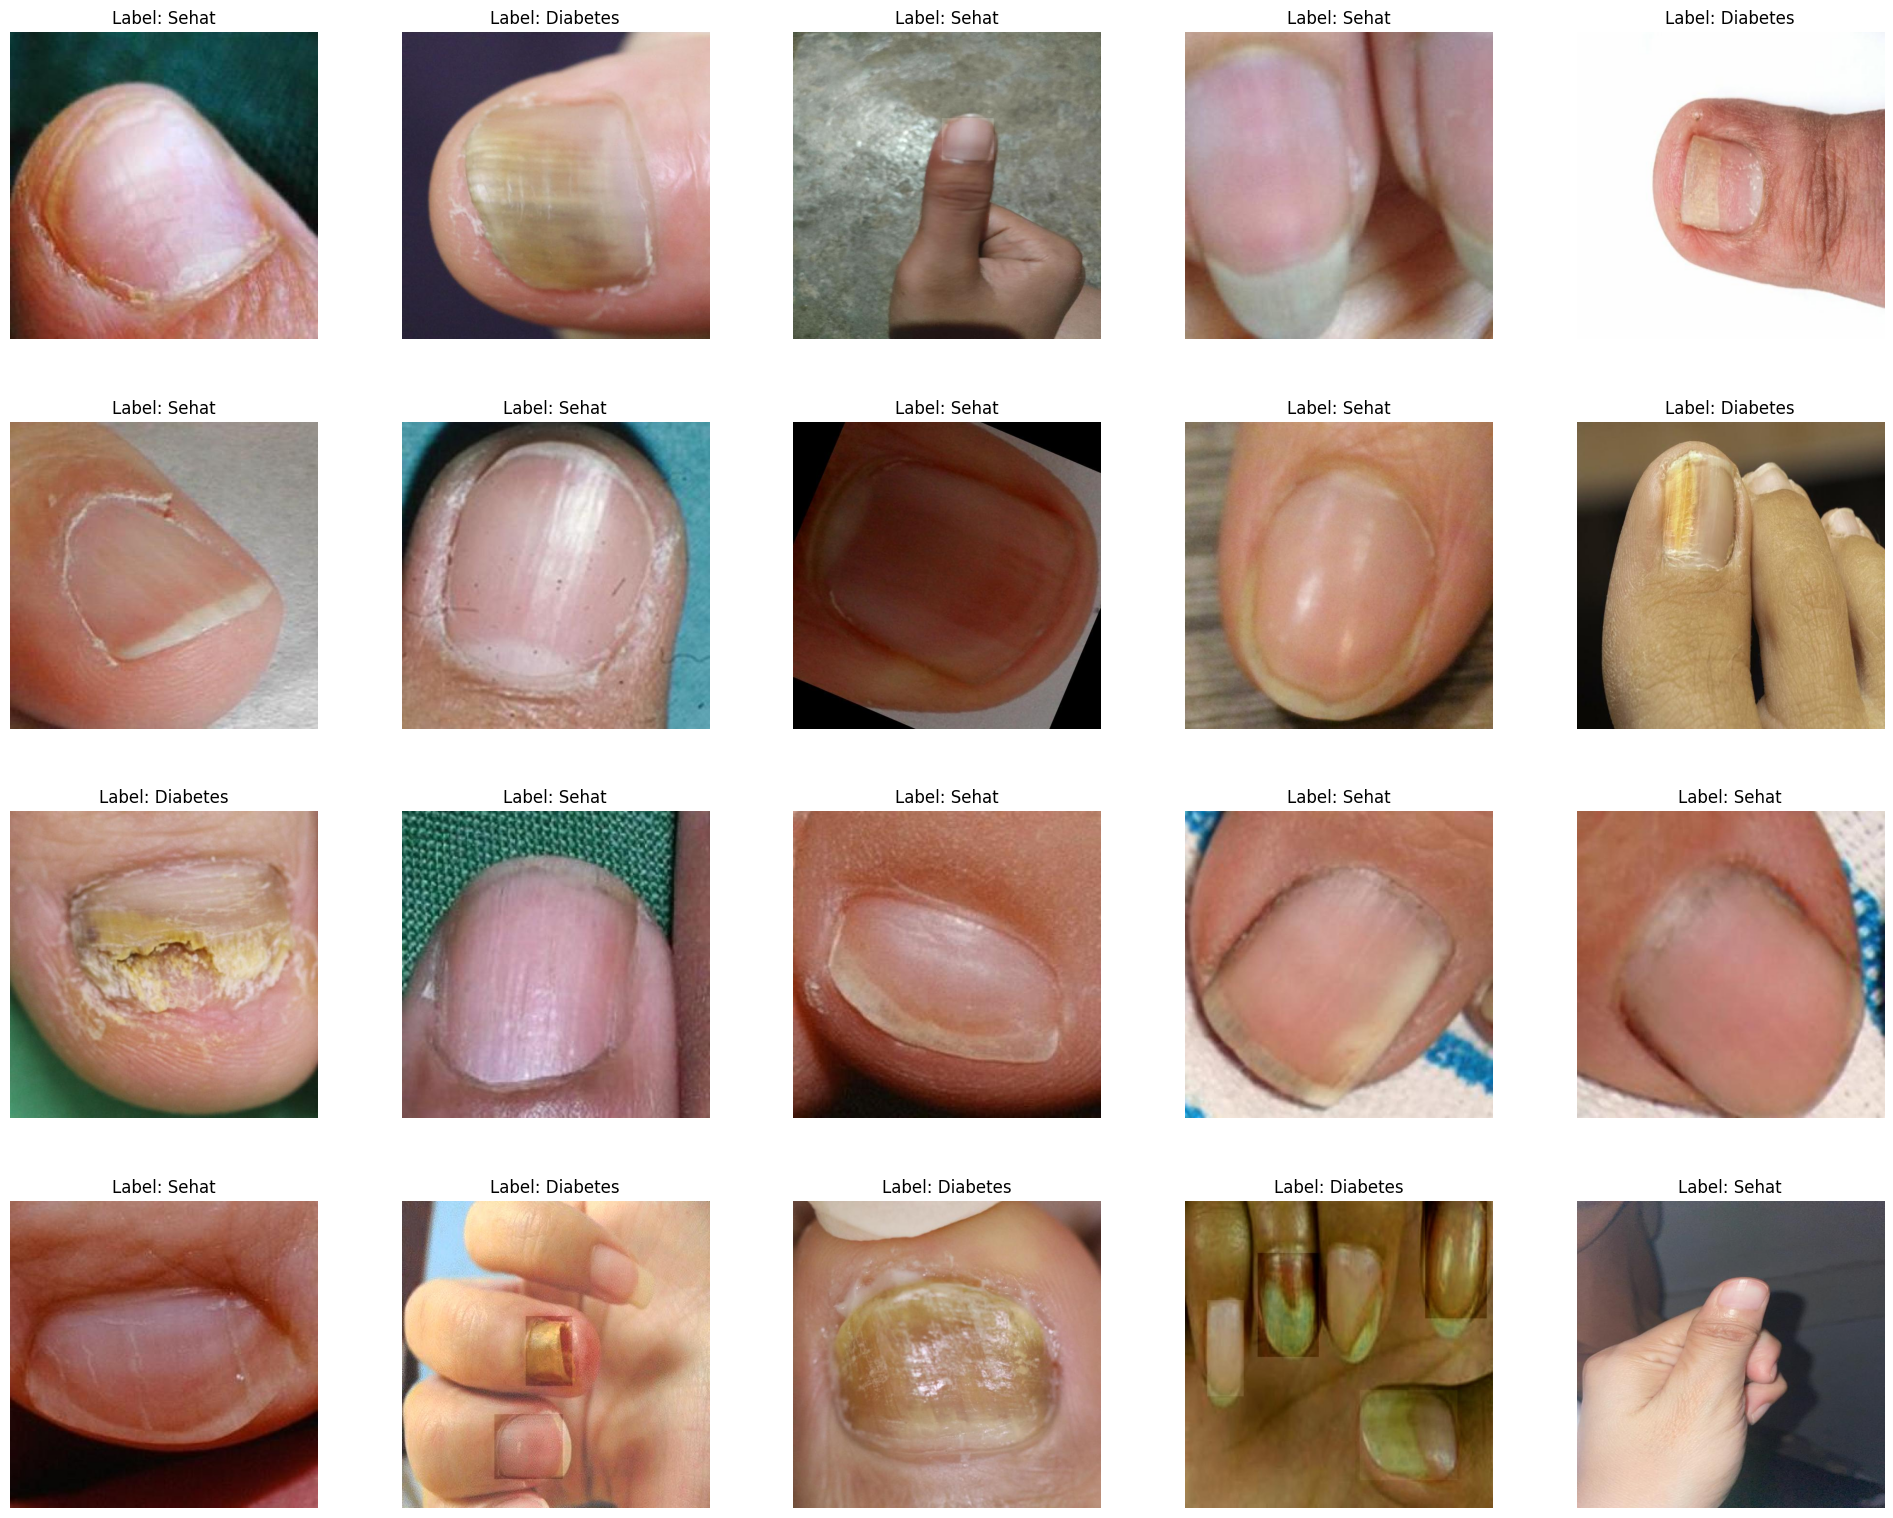

In [31]:
# Show a sample dataset of images with labels
def show_dataset(images_dir, labels_dir):
    images = [os.path.join(root, file)
              for root, dirs, files in os.walk(images_dir)
              for file in files if file.endswith('.jpg')]

    # Randomly sample 20 images from the collected list
    sample_images = random.sample(images, 20)
    fig, axes = plt.subplots(4, 5, figsize=(20, 16))
    fig.tight_layout(pad=3.0)

    # Loop through the selected images and display
    for i, img_path in enumerate(sample_images):
        # Extract the image name and generate corresponding label file path
        img_name = os.path.basename(img_path)
        label_file = os.path.join(labels_dir, img_name.replace('.jpg', '.txt'))
        img = mpimg.imread(img_path)

        # Initialize label as 'Unknown'
        label = 'Unknown'
        # Read the label from the corresponding .txt file, if it exists
        if os.path.exists(label_file):
            with open(label_file, 'r') as file:
                label_content = file.readline().strip()
                label = 'Diabetes' if label_content.startswith('0') else 'Sehat'

        ax = axes[i // 5, i % 5]
        ax.imshow(img)
        ax.set_title(f"Label: {label}")
        ax.axis('off')

    # Show the plot with the images and labels
    plt.show()

show_dataset(images_dir, labels_dir)


In [32]:
# Train the model
def train_model(yaml_file, model_save_path):
    model = YOLO('yolov8m.pt')
    model.train(
        data=yaml_file,
        epochs=50,
        batch=8,
        imgsz=640,
        verbose=True
    )

    # Save the trained model
    best_model_path = 'runs/detect/train/weights/best.pt'
    shutil.copy(best_model_path, model_save_path)

train_model(yaml_file, model_save_path)

100%|██████████| 49.7M/49.7M [00:00<00:00, 288MB/s]


Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Diabetes/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 21.2MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Diabetes/Dataset/labels/train.cache... 839 images, 3 backgrounds, 0 corrupt: 100%|██████████| 839/839 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Diabetes/Dataset/images/train/002_jpg.rf.6d782f6c99275a04a3ea421db0e6e9e1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Diabetes/Dataset/images/train/002_jpg.rf.deebdbd6f35bc0f61e7d5c6664c2b36c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Diabetes/Dataset/images/train/077_jpg.rf.c7a680d861505939ebb3c541507611ba.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 482, len(boxes) = 1162. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Diabetes/Dataset/labels/val.cache... 239 images, 0 backgrounds, 0 corrupt: 100%|██████████| 239/239 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Diabetes/Dataset/images/val/002_jpg.rf.3bda83f65b7e868204f811655f675045.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Diabetes/Dataset/images/val/077_jpg.rf.04b6268996563d5257d290110e887142.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Diabetes/Dataset/images/val/077_jpg.rf.88134e678425b85c6226fd61af57fc4a.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 169, len(boxes) = 355. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.66G      1.334       2.11      1.714         18        640: 100%|██████████| 105/105 [00:35<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:36<00:00,  2.43s/it]

                   all        239        355      0.237      0.239      0.205     0.0991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.71G      1.482      1.964      1.829         28        640: 100%|██████████| 105/105 [00:32<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.93it/s]

                   all        239        355      0.283      0.392      0.225     0.0871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       3.7G      1.612      1.925      1.907         15        640: 100%|██████████| 105/105 [00:32<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]

                   all        239        355      0.181       0.38      0.109     0.0383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.72G      1.484      1.782      1.779         21        640: 100%|██████████| 105/105 [00:31<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.22it/s]

                   all        239        355      0.302      0.438      0.293      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.62G      1.414      1.708      1.743         21        640: 100%|██████████| 105/105 [00:32<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]

                   all        239        355      0.517      0.592      0.544      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.74G      1.376      1.647      1.717         29        640: 100%|██████████| 105/105 [00:33<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]

                   all        239        355      0.529      0.613      0.532      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.71G      1.348      1.524      1.707         19        640: 100%|██████████| 105/105 [00:32<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]

                   all        239        355      0.651      0.685      0.702      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.72G      1.314       1.47      1.664         20        640: 100%|██████████| 105/105 [00:32<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.45it/s]

                   all        239        355      0.635       0.66      0.667      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.71G      1.274      1.444      1.629         27        640: 100%|██████████| 105/105 [00:31<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.27it/s]

                   all        239        355      0.632      0.713      0.714      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.72G      1.246      1.427      1.627         11        640: 100%|██████████| 105/105 [00:32<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.92it/s]

                   all        239        355      0.648      0.725      0.715      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.71G      1.205      1.337      1.587         21        640: 100%|██████████| 105/105 [00:32<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.30it/s]

                   all        239        355      0.668      0.703      0.724      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.73G      1.193       1.29      1.566         19        640: 100%|██████████| 105/105 [00:32<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]

                   all        239        355      0.672      0.735      0.744      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.63G      1.199      1.318      1.579         28        640: 100%|██████████| 105/105 [00:33<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.37it/s]

                   all        239        355      0.708      0.733      0.758      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.74G      1.135      1.234      1.519         26        640: 100%|██████████| 105/105 [00:32<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.35it/s]

                   all        239        355      0.667      0.762      0.766      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.71G      1.123      1.233      1.521         16        640: 100%|██████████| 105/105 [00:32<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.94it/s]

                   all        239        355      0.751      0.812      0.816      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.71G      1.085      1.172      1.495         18        640: 100%|██████████| 105/105 [00:31<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.50it/s]

                   all        239        355      0.775      0.713      0.801       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.72G      1.114      1.189      1.507         19        640: 100%|██████████| 105/105 [00:32<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.96it/s]

                   all        239        355      0.745      0.731      0.786      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.71G      1.085      1.098      1.482         24        640: 100%|██████████| 105/105 [00:32<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.31it/s]

                   all        239        355      0.769      0.737      0.792      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       3.7G      1.054      1.102      1.465         27        640: 100%|██████████| 105/105 [00:33<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]

                   all        239        355      0.789      0.764      0.837      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       3.7G      1.046      1.068      1.465         21        640: 100%|██████████| 105/105 [00:32<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.06it/s]

                   all        239        355      0.664      0.815      0.809      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.62G      1.054      1.069      1.459         24        640: 100%|██████████| 105/105 [00:31<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.27it/s]

                   all        239        355      0.724      0.778      0.806      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.74G       1.06      1.065      1.471         14        640: 100%|██████████| 105/105 [00:32<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.93it/s]

                   all        239        355      0.697      0.791      0.792       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       3.7G      1.033       1.04      1.449         20        640: 100%|██████████| 105/105 [00:32<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.38it/s]

                   all        239        355      0.772      0.847      0.855      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.71G      1.024       1.02       1.43         18        640: 100%|██████████| 105/105 [00:32<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.35it/s]

                   all        239        355      0.729      0.781      0.833      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.72G      1.004     0.9921      1.425         23        640: 100%|██████████| 105/105 [00:33<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.38it/s]

                   all        239        355       0.76      0.805      0.846      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.71G     0.9897     0.9604      1.402         21        640: 100%|██████████| 105/105 [00:32<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.38it/s]

                   all        239        355      0.797      0.788      0.851      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       3.7G     0.9845       0.96      1.395         19        640: 100%|██████████| 105/105 [00:32<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.33it/s]

                   all        239        355       0.84      0.794      0.881      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.69G     0.9579     0.9461      1.375         12        640: 100%|██████████| 105/105 [00:35<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.35it/s]

                   all        239        355      0.754      0.871      0.885      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.62G     0.9495       0.93      1.381         18        640: 100%|██████████| 105/105 [00:32<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.51it/s]

                   all        239        355      0.858      0.814      0.885      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.73G     0.9458     0.8702       1.37         11        640: 100%|██████████| 105/105 [00:32<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]

                   all        239        355      0.816      0.784      0.844      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.71G     0.9306     0.9125      1.352         27        640: 100%|██████████| 105/105 [00:33<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.38it/s]

                   all        239        355      0.848      0.825      0.892      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.71G      0.921       0.89       1.37         16        640: 100%|██████████| 105/105 [00:32<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.40it/s]

                   all        239        355      0.788      0.863      0.879      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.71G     0.8932     0.8687      1.335         27        640: 100%|██████████| 105/105 [00:32<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]

                   all        239        355      0.799      0.863      0.894       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.71G     0.9111     0.8691      1.351         17        640: 100%|██████████| 105/105 [00:32<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.79it/s]

                   all        239        355      0.849      0.845       0.89      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.72G     0.8841     0.8148      1.318         24        640: 100%|██████████| 105/105 [00:32<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.09it/s]

                   all        239        355      0.884      0.812       0.89      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       3.7G     0.8744     0.8024      1.306         18        640: 100%|██████████| 105/105 [00:32<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.33it/s]

                   all        239        355      0.826      0.888        0.9      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.63G     0.8678     0.8449      1.332         21        640: 100%|██████████| 105/105 [00:32<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.74it/s]

                   all        239        355      0.886      0.847       0.91      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.74G     0.8721     0.7876       1.33         17        640: 100%|██████████| 105/105 [00:33<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.32it/s]

                   all        239        355       0.88      0.848      0.915      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.72G     0.8618     0.7674      1.309         13        640: 100%|██████████| 105/105 [00:32<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]

                   all        239        355      0.882      0.877      0.928      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.72G     0.8597     0.7438      1.314         19        640: 100%|██████████| 105/105 [00:32<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.37it/s]

                   all        239        355      0.881      0.852      0.923      0.731


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.72G     0.7616     0.6552      1.349          7        640: 100%|██████████| 105/105 [00:33<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.31it/s]

                   all        239        355      0.858      0.865      0.908      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.71G     0.7353     0.5866      1.339          7        640: 100%|██████████| 105/105 [00:32<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.09it/s]

                   all        239        355      0.865      0.859      0.919      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       3.7G     0.7348     0.5635      1.311         13        640: 100%|██████████| 105/105 [00:32<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.52it/s]

                   all        239        355      0.861      0.868      0.907      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       3.7G     0.7345     0.5713      1.319          8        640: 100%|██████████| 105/105 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.10it/s]

                   all        239        355      0.871      0.873      0.909      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.62G     0.6935     0.5436      1.306         11        640: 100%|██████████| 105/105 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.07it/s]

                   all        239        355      0.883      0.839      0.911      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.73G     0.6872     0.5098      1.286          9        640: 100%|██████████| 105/105 [00:32<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.70it/s]

                   all        239        355      0.876      0.873      0.912      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       3.7G     0.6775     0.5178      1.287         12        640: 100%|██████████| 105/105 [00:32<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]

                   all        239        355      0.893      0.877       0.92       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.72G     0.6638     0.5093      1.268          8        640: 100%|██████████| 105/105 [00:32<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]

                   all        239        355      0.903      0.867      0.923      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       3.7G     0.6572     0.4737      1.258          8        640: 100%|██████████| 105/105 [00:32<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]

                   all        239        355      0.917      0.875       0.92      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.72G     0.6479     0.4718      1.255         14        640: 100%|██████████| 105/105 [00:32<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.32it/s]

                   all        239        355       0.92      0.863       0.92      0.746



50 epochs completed in 0.544 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.38it/s]


                   all        239        355      0.903      0.867      0.923      0.749
              Diabetes        129        206      0.917      0.801      0.904      0.714
                 Sehat        117        149       0.89      0.933      0.942      0.785
Speed: 0.4ms preprocess, 10.4ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train


mAP50: 0.9204, Precision: 0.9198, Recall: 0.8627


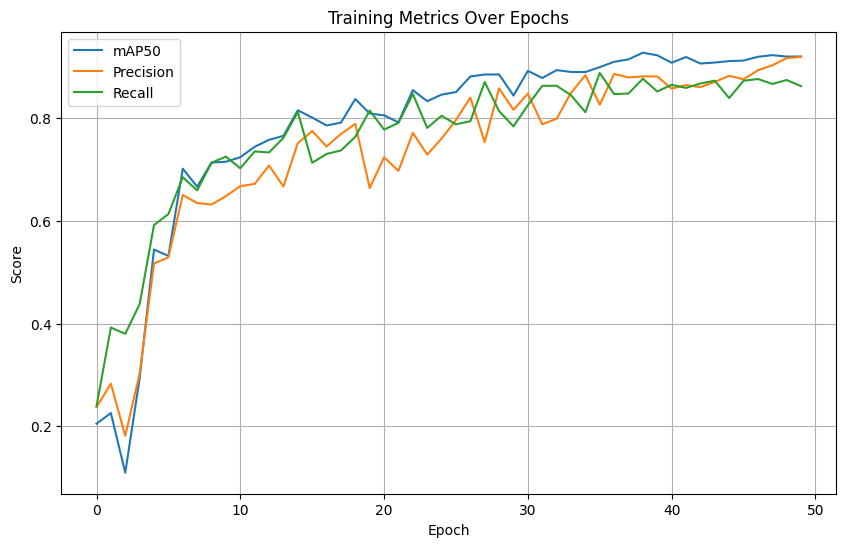

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

def display_training_results():
    results_csv_path = 'runs/detect/train/results.csv'

    # Read the CSV file
    df = pd.read_csv(results_csv_path)

    # Get the last epoch metrics
    last_epoch = df.iloc[-1]
    mAP50, precision, recall = last_epoch['metrics/mAP50(B)'], last_epoch['metrics/precision(B)'], last_epoch['metrics/recall(B)']

    # Display metrics
    print(f"mAP50: {mAP50:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    # Plot the training metrics
    df[['metrics/mAP50(B)', 'metrics/precision(B)', 'metrics/recall(B)']].plot(figsize=(10, 6))
    plt.title('Training Metrics Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend(['mAP50', 'Precision', 'Recall'])
    plt.grid(True)
    plt.show()

# Display training results
display_training_results()


0: 640x640 4 Sehats, 37.0ms
Speed: 1.7ms preprocess, 37.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


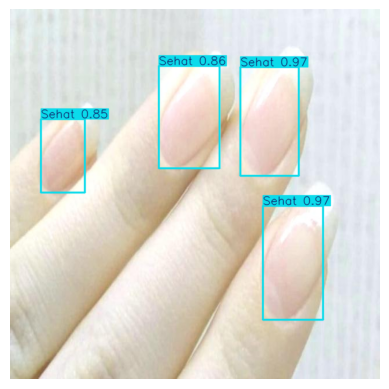

In [71]:
# Detection results
def display_detection_result(image_path, model_save_path):
    model = YOLO(model_save_path)
    img = cv2.imread(image_path)
    results = model(img)
    annotated_img = results[0].plot()
    annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
    plt.imshow(annotated_img_rgb)
    plt.axis('off')
    plt.show()

# get a random image from the 'test' folder
def get_random_image(images_dir):
    images = [os.path.join(images_dir, img) for img in os.listdir(images_dir) if img.endswith(('.jpg', '.jpeg', '.png'))]
    return random.choice(images)

# Paths
images_dir = '/content/drive/MyDrive/Diabetes/Dataset/images/test'
model_save_path = '/content/drive/MyDrive/Diabetes/checkpoints/yolov8_trained.pt'

# Get a random image and display the detection result
image_path = get_random_image(images_dir)
display_detection_result(image_path, model_save_path)


In [47]:
model = YOLO(model_save_path)
for label in ['Diabetes', 'Sehat']:
    os.makedirs(os.path.join(crop_output_dir, label), exist_ok=True)

def crop_fingernails(images_dir, model, crop_output_dir):
    # Iterate over images in the images directory
    for img_name in os.listdir(images_dir):
        if img_name.endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(images_dir, img_name)
            image = cv2.imread(img_path)

            # Get predictions from the model
            results = model(img_path)

            # Process each detection
            for result in results:
                boxes = result.boxes.xyxy.cpu().numpy()
                classes = result.boxes.cls.cpu().numpy()
                # Crop each detection and save it
                for i, box in enumerate(boxes):
                    x1, y1, x2, y2 = map(int, box)
                    class_id = int(classes[i])

                    # Determine the label based on the predicted class
                    label = 'Diabetes' if class_id == 0 else 'Sehat'

                    # Crop and resize the image
                    cropped_img = image[y1:y2, x1:x2]
                    resized_img = cv2.resize(cropped_img, (300, 300))

                    # Save the cropped image
                    cropped_name = f"{os.path.splitext(img_name)[0]}_crop_{i}.jpg"
                    save_path = os.path.join(crop_output_dir, label, cropped_name)
                    cv2.imwrite(save_path, resized_img)
                    print(f"Cropped image saved: {save_path}")

crop_fingernails(images_dir, model, crop_output_dir)


image 1/1 /content/drive/MyDrive/Diabetes/Dataset/images/train/B2_OM-23-_JPG_jpg.rf.5b042c79d2042301e6cd3be2b1a7a25d.jpg: 640x640 1 Diabetes, 37.0ms
Speed: 5.4ms preprocess, 37.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Cropped image saved: /content/drive/MyDrive/Diabetes/data_crop/Diabetes/B2_OM-23-_JPG_jpg.rf.5b042c79d2042301e6cd3be2b1a7a25d_crop_0.jpg

image 1/1 /content/drive/MyDrive/Diabetes/Dataset/images/train/semisuper_336_929_256_1505_851_img00336-20120309-10041_jpg.rf.a30ad6c904cc14393909a70a96778872.jpg: 640x640 1 Sehat, 37.0ms
Speed: 2.1ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Cropped image saved: /content/drive/MyDrive/Diabetes/data_crop/Sehat/semisuper_336_929_256_1505_851_img00336-20120309-10041_jpg.rf.a30ad6c904cc14393909a70a96778872_crop_0.jpg

image 1/1 /content/drive/MyDrive/Diabetes/Dataset/images/train/12-1_jpg.rf.30a89a47df218abbfb1dd5e6a2b4429f.jpg: 640x640 5 Diabetess, 2 Sehats, 33.1ms
Spee